# Data mining class hw3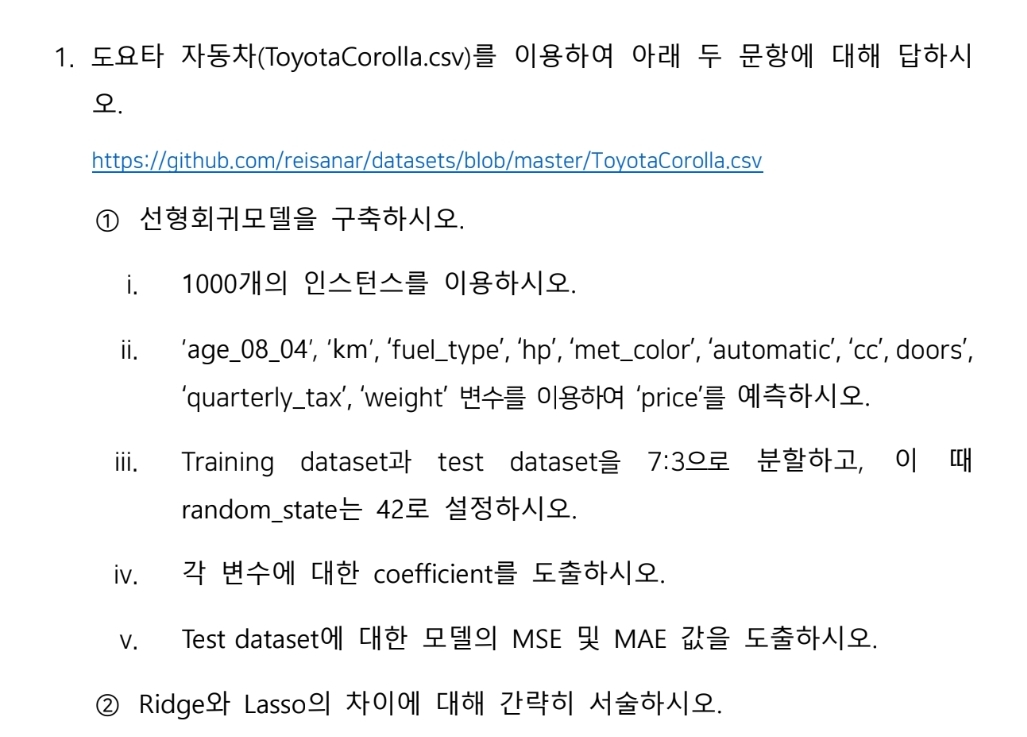

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

toyota_df =pd.read_csv("https://raw.githubusercontent.com/reisanar/datasets/master/ToyotaCorolla.csv")
toyota_df = toyota_df.sample(n=1000, random_state=42)
toyota_df


,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
594,TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-...,10800,50,7,2000,22500,Petrol,97,1,Green,...,0,1,0,0,0,1,0,0,0,0
754,TOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-D...,9950,68,1,1999,80426,Petrol,110,1,Green,...,1,1,0,1,0,1,0,0,0,0
630,TOYOTA Corolla 2.0D XL Sedan 4/5-Doors,7500,59,10,1999,130000,Diesel,72,1,Grey,...,0,1,1,0,0,0,0,1,0,0
1259,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,9250,71,10,1998,76000,Petrol,110,1,Blue,...,1,1,0,0,0,1,0,0,0,1
903,TOYOTA Corolla 1.6 VVTi Linea Luna Lift 4/5-Doors,9750,65,4,1999,59000,Petrol,110,0,Green,...,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,TOYOTA Corolla 1.9 D LB LINEA SOL 4/5-Doors,9950,53,4,2000,117913,Diesel,69,1,Blue,...,1,1,0,1,0,0,1,0,0,0
284,TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-D...,11950,41,4,2001,45287,Petrol,110,1,Red,...,0,1,0,0,0,1,0,0,0,1
555,TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-D...,11250,50,7,2000,40400,Petrol,97,1,Red,...,1,1,0,0,0,1,0,0,0,1
42,TOYOTA Corolla 1.4 16V VVT I 3DR 2/3-Doors,13950,22,11,2002,46961,Petrol,97,0,Blue,...,0,1,0,0,1,1,0,0,0,0


In [ ]:
X = toyota_df[['age_08_04', 'fuel_type', 'hp', 'met_color', 'automatic', 'cc', 'doors', 'quarterly_tax', 'weight']]
y = toyota_df['price']

X = pd.get_dummies(X, columns=['fuel_type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

coef = pd.DataFrame({'variable': X_train.columns, 'coefficient': model.coef_})
print(coef)

           variable  coefficient
0         age_08_04  -136.928090
1                hp    43.973118
2         met_color    -0.681895
3         automatic   293.996344
4                cc    -3.286797
5             doors  -120.115125
6     quarterly_tax    15.836377
7            weight    20.291371
8  fuel_type_Diesel  2055.859548
9  fuel_type_Petrol  3317.676504


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mae)

MSE: 9672060.540581362
MAE: 1200.0007953612242


## Ridge 와 Lasso 창 
#### Ridge와 Lasso는 선형 회귀 모델의 regularization(규제) 기법으로 사용됩니다. 이들은 변수 선택 및 모델 복잡도를 조절하여 overfitting을 방지하고 모델의 일반화 성능을 개선하는 데 사용됩니다. 

Ridge 회귀는 L2 규제를 사용하며, 계수를 0으로 만들지는 않지만, 작은 값을 가지도록 합니다. 이는 Ridge 모델이 모든 변수를 유지하면서 변수 간 상관관계를 줄여 모델의 과적합을 방지합니다. Ridge 모델의 목적 함수는 RSS(잔차 제곱합) + alpha * (L2 Norm of coefficients)로 정의됩니다.

Lasso 회귀는 L1 규제를 사용하며, 일부 계수를 0으로 만듭니다. 이는 Lasso 모델이 변수 선택을 수행하고 불필요한 변수를 제거함으로써 모델을 간단하게 만듭니다. Lasso 모델의 목적 함수는 RSS(잔차 제곱합) + alpha * (L1 Norm of coefficients)로 정의됩니다.

따라서, Ridge와 Lasso의 차이점은 규제 기법과 변수의 선택 방법입니다. Ridge는 변수를 줄이지 않고 변수 간 상관관계를 줄이는 데 중점을 둡니다. 반면 Lasso는 변수를 선택하고 불필요한 변수를 제거하는 데 중점을 둡니다. 따라서, Ridge는 일반적으로 변수가 많은 데이터셋에서 사용되고, Lasso는 변수 선택이 중요한 데이터셋에서 사용됩니다.

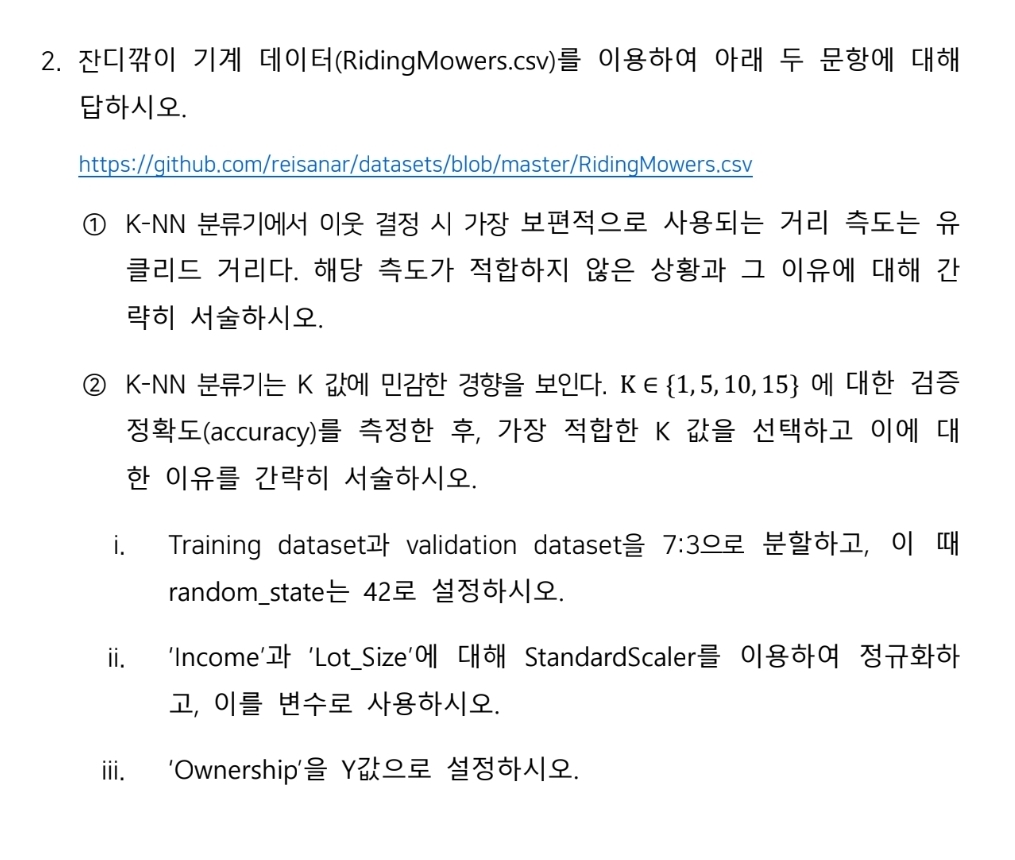

#### 유클리드 거리 측도는 대부분의 상황에서 적절하게 사용될 수 있지만, 다음과 같은 경우에는 적합하지 않을 수 있습니다.

1. 변수의 스케일이 다른 경우: 변수의 스케일이 다르면 거리 측도가 달라질 수 있습니다. 이러한 상황에서는 각 변수의 스케일을 동일하게 조정하거나 다른 거리 측도를 사용하는 것이 좋습니다.

2. 이상치(outlier)가 있는 경우: 이상치는 일반적인 데이터와 매우 다른 값을 가지기 때문에 거리 측도가 크게 영향을 받을 수 있습니다. 따라서, 이러한 상황에서는 이상치를 식별하고 처리하는 것이 중요합니다.

3. 범주형 변수가 있는 경우: 유클리드 거리는 연속적인 숫자 값에 대해서만 정의됩니다. 범주형 변수를 사용할 경우, 다른 거리 측도를 사용하는 것이 적합합니다.

4. 차원의 저주(curse of dimensionality)가 있는 경우: 고차원 데이터에서는 유클리드 거리가 적합하지 않을 수 있습니다. 이는 차원이 증가함에 따라 각 데이터 간의 거리가 멀어지기 때문입니다. 이러한 상황에서는 차원 축소 기법 등을 사용하여 문제를 해결할 수 있습니다.

따라서, 데이터의 특성에 따라 유클리드 거리가 적합하지 않을 수 있으며, 이러한 상황에서는 다른 거리 측도를 사용하는 것이 좋습니다.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 데이터 불러오기
rdf = pd.read_csv('https://github.com/reisanar/datasets/raw/master/RidingMowers.csv')
rdf.head()


,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [ ]:
X = rdf[['Income', 'Lot_Size']]
y = rdf['Ownership']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Training dataset과 validation dataset을 7:3으로 분할

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# K-NN 분류기 학습 및 검증

for k in [1, 5, 10, 15]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_val)
  acc = accuracy_score(y_val, y_pred)
  print(f'K={k}일 때, 정확도: {acc:.4f}')

K=1일 때, 정확도: 0.3750
K=5일 때, 정확도: 0.5000
K=10일 때, 정확도: 0.6250
K=15일 때, 정확도: 0.3750


In [ ]:
# 선택된 가장 적합한 K 값은 10이며, 이는 검증 정확도가 가장 높았기 때문에 선택하였음